<a id='1'></a>
<div class="alert alert-block alert-danger"><h2 style="text-align:center;color:black"> Introduction 💥</h2> </div>

In this article, we will discover how to develop a CNN to classify images of dogs and cats.

After reading this article, you will know :

* How to load and prepare the images for training purpose.
* How to split data for training and validation purpose.
* How to apply Data Augmentation to the data.
* How to develop a CNN model using keras and how to choose various parameters for improving performance of the model.
* How to evaluate performance of our model.
* How to save and load a model for further predictions.
* How to draw the confusion matrix for trained model.

<a id='2'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Description </h2> </div>

The training archive contains 25,000 images of dogs and cats.

Train your algorithm on these files and predict the labels for test1.zip.
* **1 = dog**
* **0 = cat**


<a id='3'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div>

In [5]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [4]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


<a id='4'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Extraction </h2> </div>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/archive (2).zip"  # Path to your ZIP file
extract_path = "/content/dataset"  # Destination folder

# Extracting ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: /content/dataset


In [9]:
cat= os.listdir('/content/dataset/PetImages/Cat')
dog = os.listdir('/content/dataset/PetImages/Dog')

print(cat[:5])
print(dog[:5])

['8890.jpg', '2978.jpg', '3477.jpg', '6266.jpg', '11290.jpg']
['8890.jpg', '2978.jpg', '3477.jpg', '6266.jpg', '11290.jpg']


In [10]:
print(len(cat))
print(len(dog))

12499
12499


In [11]:
cat_labels = [1]*12499
dog_labels = [0]*12499

In [12]:
print(cat_labels[:5])
print(dog_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
labels =cat_labels + dog_labels
print(len(labels))

24998


In [14]:
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


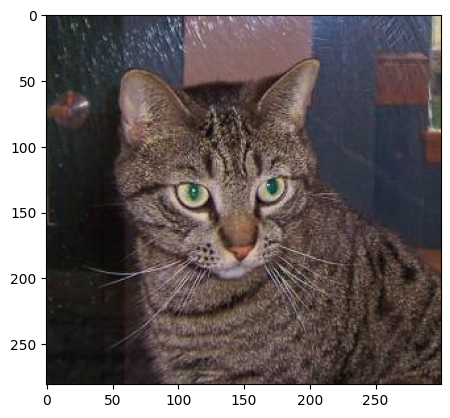

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the module

img = mpimg.imread('/content/dataset/PetImages/Cat/1.jpg') # Now mpimg is defined and can be used
imgplot = plt.imshow(img)
plt.show()

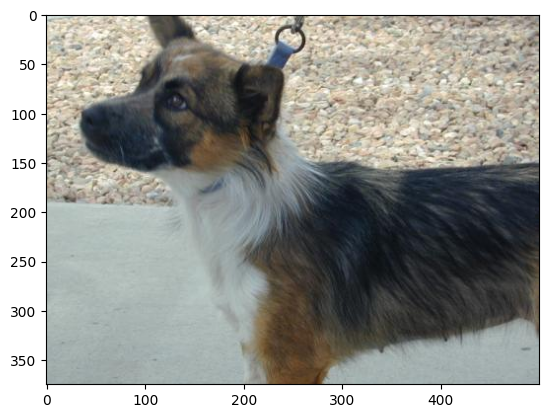

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the module

img = mpimg.imread('/content/dataset/PetImages/Dog/3.jpg') # Now mpimg is defined and can be used
imgplot = plt.imshow(img)
plt.show()

In [17]:
# convert images to numpy arrays+

cat_path = '/content/dataset/PetImages/Cat/'

data = []

for img_file in cat:

  image = Image.open(cat_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



dog_path = '/content/dataset/PetImages/Dog/'


for img_file in dog:

  image = Image.open(dog_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


array([[[ 73,  45,  32],
        [ 69,  46,  35],
        [ 62,  45,  35],
        ...,
        [161, 140,  95],
        [157, 137,  94],
        [154, 135,  93]],

       [[ 65,  45,  34],
        [ 64,  48,  39],
        [ 55,  43,  37],
        ...,
        [161, 140,  96],
        [158, 138,  95],
        [155, 136,  94]],

       [[ 58,  43,  32],
        [ 58,  46,  37],
        [ 48,  37,  32],
        ...,
        [166, 145, 100],
        [162, 142,  99],
        [159, 140,  98]],

       ...,

       [[166, 171, 167],
        [161, 163, 161],
        [163, 163, 163],
        ...,
        [140, 163, 157],
        [146, 170, 164],
        [145, 170, 164]],

       [[169, 170, 166],
        [168, 171, 171],
        [167, 169, 173],
        ...,
        [139, 161, 156],
        [143, 165, 159],
        [134, 156, 151]],

       [[155, 155, 152],
        [152, 154, 156],
        [151, 154, 161],
        ...,
        [135, 154, 150],
        [136, 156, 152],
        [136, 157, 152]]], dtype=uint8)
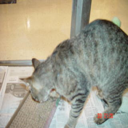

In [19]:
data[0]

In [20]:
len(data)


24998

In [21]:
x = np.array(data)
y = np.array(labels)

In [22]:
len(x)

24998

In [23]:
len(y)

24998

In [24]:
type(x)

numpy.ndarray

In [25]:
type(y)

numpy.ndarray

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

array([[[ 14,  16,  13],
        [ 13,  15,  12],
        [ 11,  13,  10],
        ...,
        [ 95, 148,  42],
        [ 88, 139,  40],
        [ 69, 125,  27]],

       [[ 13,  15,  12],
        [ 13,  15,  12],
        [ 14,  16,  13],
        ...,
        [ 94, 150,  42],
        [ 86, 140,  42],
        [ 61, 110,  31]],

       [[ 13,  15,  12],
        [ 14,  16,  13],
        [ 14,  16,  13],
        ...,
        [ 94, 151,  46],
        [ 84, 140,  41],
        [ 53,  95,  28]],

       ...,

       [[ 55,  87,  24],
        [ 67, 100,  28],
        [ 65,  96,  34],
        ...,
        [198, 190, 171],
        [213, 209, 192],
        [222, 218, 201]],

       [[ 61,  91,  30],
        [ 77, 108,  38],
        [ 60,  89,  28],
        ...,
        [215, 209, 186],
        [210, 208, 189],
        [207, 207, 185]],

       [[ 41,  85,  22],
        [ 59, 104,  32],
        [ 45,  89,  25],
        ...,
        [211, 207, 181],
        [206, 207, 185],
        [170, 175, 147]]], dtype=uint8)
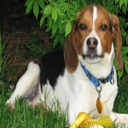

In [27]:
x_train[0]

In [28]:
x_train_scal = x_train/255
x_test_scal = x_test/255

In [29]:
x_train_scal[0]

array([[[0.05490196, 0.0627451 , 0.05098039],
        [0.05098039, 0.05882353, 0.04705882],
        [0.04313725, 0.05098039, 0.03921569],
        ...,
        [0.37254902, 0.58039216, 0.16470588],
        [0.34509804, 0.54509804, 0.15686275],
        [0.27058824, 0.49019608, 0.10588235]],

       [[0.05098039, 0.05882353, 0.04705882],
        [0.05098039, 0.05882353, 0.04705882],
        [0.05490196, 0.0627451 , 0.05098039],
        ...,
        [0.36862745, 0.58823529, 0.16470588],
        [0.3372549 , 0.54901961, 0.16470588],
        [0.23921569, 0.43137255, 0.12156863]],

       [[0.05098039, 0.05882353, 0.04705882],
        [0.05490196, 0.0627451 , 0.05098039],
        [0.05490196, 0.0627451 , 0.05098039],
        ...,
        [0.36862745, 0.59215686, 0.18039216],
        [0.32941176, 0.54901961, 0.16078431],
        [0.20784314, 0.37254902, 0.10980392]],

       ...,

       [[0.21568627, 0.34117647, 0.09411765],
        [0.2627451 , 0.39215686, 0.10980392],
        [0.25490196, 0

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

# kernel_size=(3, 3): Size of the convolution kernel.
# input_shape=(height, width, channels)
# MaxPooling2D - this layer is added after a convolutional layer to reduce the spatial dimensions of the feature maps
# -and control overfitting by reducing the number of parameters.
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))



model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
# It's a common practice to use dropout after fully connected (dense) layers
# or sometimes after convolutional layers to improve generalization.
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [35]:
model.fit(x_train_scal, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 409s 726ms/step - acc: 0.5550 - loss: 0.6830 - val_acc: 0.6745 - val_loss: 0.6151
Epoch 2/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 410s 727ms/step - acc: 0.6769 - loss: 0.6107 - val_acc: 0.7025 - val_loss: 0.5682
Epoch 3/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 411s 729ms/step - acc: 0.7431 - loss: 0.5303 - val_acc: 0.7290 - val_loss: 0.5422
Epoch 4/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 411s 730ms/step - acc: 0.7971 - loss: 0.4448 - val_acc: 0.7410 - val_loss: 0.5238
Epoch 5/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 408s 725ms/step - acc: 0.8374 - loss: 0.3672 - val_acc: 0.7530 - val_loss: 0.5398
Epoch 6/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 410s 729ms/step - acc: 0.8849 - loss: 0.2887 - val_acc: 0.7545 - val_loss: 0.5878
Epoch 7/30
295/563 ━━━━━━━━━━━━━━━━━━━━ 3:10 712ms/step - acc: 0.9155 - loss: 0.2163

KeyboardInterrupt: 

In [ ]:
model.save("cat_dog_model.h5")


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')